# Section 1
Compare Dice Coefficient using :
1. Binary Thresholding with a fixed threshold.
2. Otsu's Method.
3. Optimized thresholding using the Dice Coefficient.
4.
Visualize the results by comparison of the original image, ground truth mask, and the results from each thresholding method.

P.S: Use skimage library

Input Image

In [ ]:
!gdown "1sWYKuwLg_1nFylJ1h9Xpjr5zy-1-BwcN"  # Input image

Downloading...
From: https://drive.google.com/uc?id=1sWYKuwLg_1nFylJ1h9Xpjr5zy-1-BwcN
To: /content/LAB05 IMG1.png
100% 61.6k/61.6k [00:00<00:00, 35.6MB/s]


Ground Truth Image


In [ ]:
!gdown "15jipoft8qFVghFrLVlWTDJmvtZTKuVeB" # Ground Truth

Downloading...
From: https://drive.google.com/uc?id=15jipoft8qFVghFrLVlWTDJmvtZTKuVeB
To: /content/LAB05 IMG2.png
100% 15.4k/15.4k [00:00<00:00, 35.4MB/s]


In [ ]:
from skimage import io, transform
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
from skimage.filters import threshold_otsu

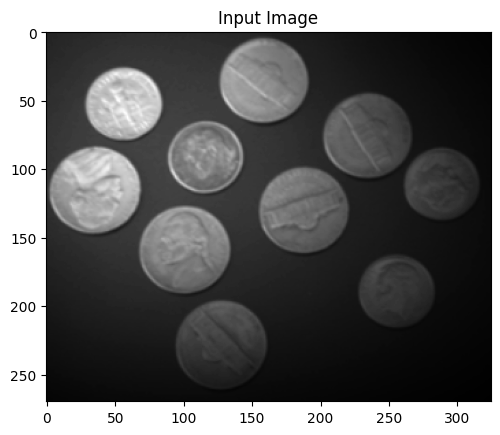

In [ ]:
# Load and display the input image
# Answer your code here
image_path = 'LAB05 IMG1.png'
imageG = io.imread(image_path, as_gray=True)

plt.title("Input Image")
plt.imshow(imageG, cmap='gray')
plt.show()

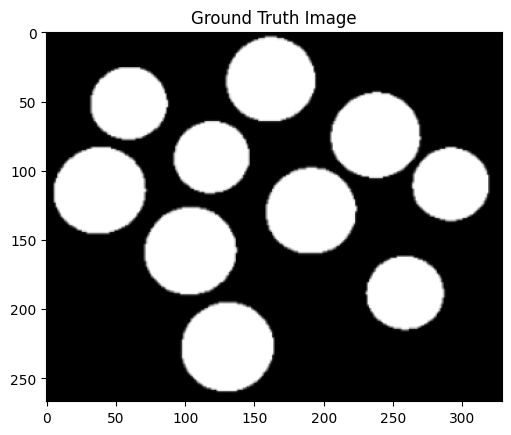

In [ ]:
# Load and display the ground truth image
# Answer your code here
image_path = 'LAB05 IMG2.png'
gt_img = io.imread(image_path, as_gray=True)

plt.title("Ground Truth Image")
plt.imshow(gt_img, cmap='gray')
plt.show()

In [ ]:
# Answer your code here
imageG = io.imread('LAB05 IMG1.png', as_gray=True)
image = (imageG * 255).astype(np.uint8)

ground_truth = io.imread('LAB05 IMG2.png', as_gray=True)
ground_truth = transform.resize(ground_truth, image.shape, mode='reflect', anti_aliasing=False)
ground_truth_binary = (ground_truth > 0.5).astype(np.uint8)


# Fixed thredhold
threshold_value = 65
fix_thred_img = (image >= threshold_value).astype(np.uint8)
intersection = np.sum(fix_thred_img * ground_truth_binary)
fix_dic_coef = (2. * intersection) / (np.sum(fix_thred_img) + np.sum(ground_truth_binary) + 1e-6)

# Otsu's method
otsu_threshold = threshold_otsu(image)
otsu_img = image > otsu_threshold
intersection = np.sum(otsu_img * ground_truth_binary)
otsu_dic_coef = (2. * intersection) / (np.sum(otsu_img) + np.sum(ground_truth_binary) + 1e-6)

# Optimized thresholding using the Dice Coefficient
coef_thred = 0
max_dice_coef = 0

for threshold in range(256):
    binary_image = (image >= threshold).astype(np.uint8)

    intersection = np.sum(binary_image * ground_truth_binary)
    dice_coefficient = (2. * intersection) / (np.sum(binary_image) + np.sum(ground_truth_binary) + 1e-6)

    if dice_coefficient > max_dice_coef:
        max_dice_coef = dice_coefficient
        coef_thred = threshold
coef_img = (image >= coef_thred).astype(np.uint8)

# print
print(f"""
Fixed thredhold : {threshold_value} \t\twith Dice Coefficient : {fix_dic_coef:.4f}
Otsu's method thredhold : {otsu_threshold} \twith Dice Coefficient : {otsu_dic_coef:.4f}
Optimized thredhold : {coef_thred} \twith Dice Coefficient : {max_dice_coef:.4f}
""")


Fixed thredhold : 65 		with Dice Coefficient : 0.8091
Otsu's method thredhold : 81 	with Dice Coefficient : 0.7338
Optimized thredhold : 61 	with Dice Coefficient : 0.8180



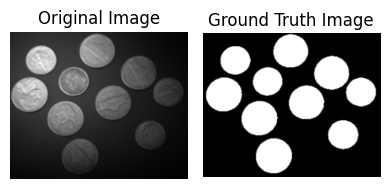

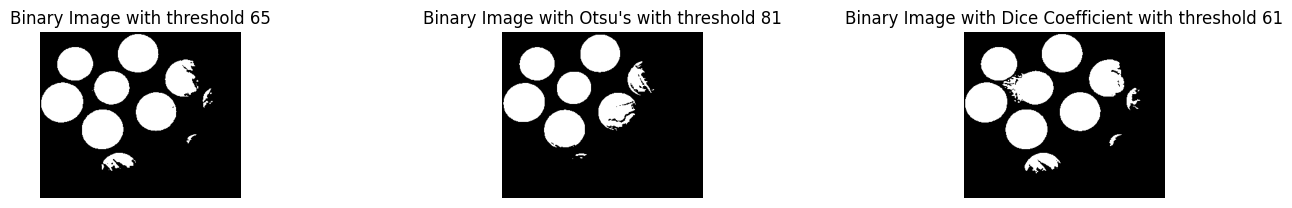

In [ ]:
# Plotting
plt.figure(figsize=(4, 4))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(imageG, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Ground Truth Image')
plt.imshow(gt_img, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 4))
plt.subplot(2, 3, 1)
plt.title(f'Binary Image with threshold {threshold_value}')
plt.imshow(fix_thred_img, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.title(f'Binary Image with Otsu\'s with threshold {otsu_threshold}')
plt.imshow(otsu_img, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.title(f'Binary Image with Dice Coefficient with threshold {coef_thred}')
plt.imshow(coef_img, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

# Section 2
Image Clustering
1. Use the given image and try clustering with 3 different k.
2. Compare and display the results.
3. In which scenario, small k or large k, do the dogs in the image retain the most visual detail?

P.S: Use OpenCV library

In [ ]:
!gdown "1VwgQxqmhhZTCRqI77kkS6cVRunBzZdsa" # Input image for clustering

Downloading...
From: https://drive.google.com/uc?id=1VwgQxqmhhZTCRqI77kkS6cVRunBzZdsa
To: /content/LAB 05 shiba.jpg
100% 99.2k/99.2k [00:00<00:00, 16.7MB/s]


In [ ]:
from sklearn.cluster import KMeans

Absolutely large k have most visual detail



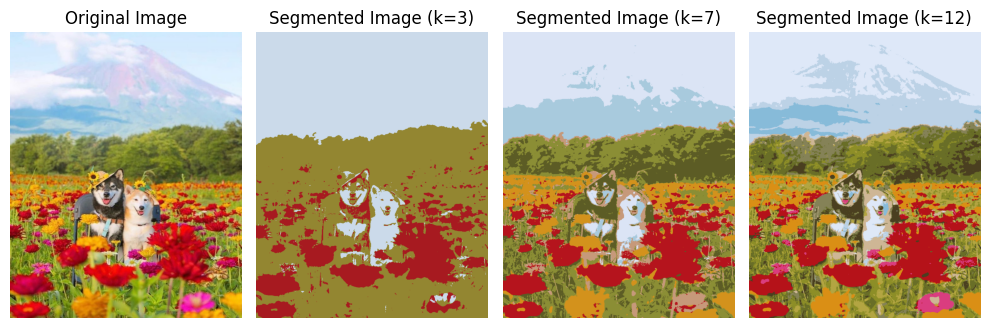

In [ ]:
# Answer your code here
shiba = cv.imread('LAB 05 shiba.jpg')
shiba = cv.cvtColor(shiba, cv.COLOR_BGR2RGB)
shiba_pixels = shiba.reshape(-1, 3)

result_seg = {}

for k in [3, 7, 12]:
# k = 12
  kmeans = KMeans(n_clusters=k, random_state=0).fit(shiba_pixels)
  segmented_pixels = kmeans.cluster_centers_[kmeans.labels_]
  result_seg[str(k)] = segmented_pixels.reshape(shiba.shape).astype('uint8')

print("Absolutely large k have most visual detail\n")

plt.figure(figsize=(10, 5))
plt.subplot(1, 4, 1)
plt.title('Original Image')
plt.imshow(shiba)
plt.axis("off")

plt.subplot(1, 4, 2)
plt.title('Segmented Image (k=3)')
plt.imshow(result_seg['3'])
plt.axis("off")

plt.subplot(1, 4, 3)
plt.title('Segmented Image (k=7)')
plt.imshow(result_seg['7'])
plt.axis("off")

plt.subplot(1, 4, 4)
plt.title('Segmented Image (k=12)')
plt.imshow(result_seg['12'])
plt.axis("off")

plt.tight_layout()
plt.show()


# Section 3

Binary image processing (Basic operators)


> Data that you'll use in this section is "old text paragraph image" and implement to solve each prblem to get result with scikit-image libraries.


1.   In image there has some alphabets which missing and faded so you need to make whole paragraph more clear and easy to read than original image.



In [ ]:
#import data
!gdown 11WNV3Yr6hZNpRVF4ftNaNF8DYyVlWJlX

Downloading...
From: https://drive.google.com/uc?id=11WNV3Yr6hZNpRVF4ftNaNF8DYyVlWJlX
To: /content/OldText.png
100% 148k/148k [00:00<00:00, 53.2MB/s]


In [ ]:
morphology.disk(1)

array([[0, 1, 0],
       [1, 1, 1],
       [0, 1, 0]], dtype=uint8)

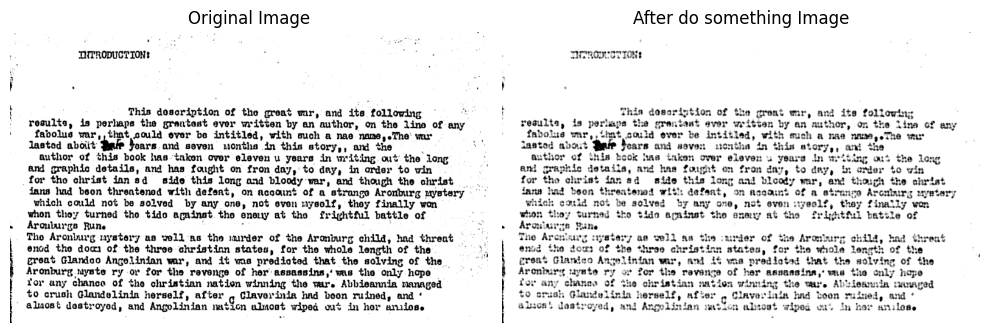

In [ ]:
# Import libraries
# Load and display the input image
# Answer your code here
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
from skimage import morphology

image_gray = io.imread('OldText.png', as_gray=True)

selem = morphology.disk(1)
closed_image = morphology.closing(image_gray, selem)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image_gray, cmap='gray')
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title('After do something Image')
plt.imshow(closed_image, cmap='gray')
plt.axis("off")

plt.tight_layout()
plt.show()

2. If you can see background of text image is having some noise. To make our background clear you need to remove noises as much as possible.

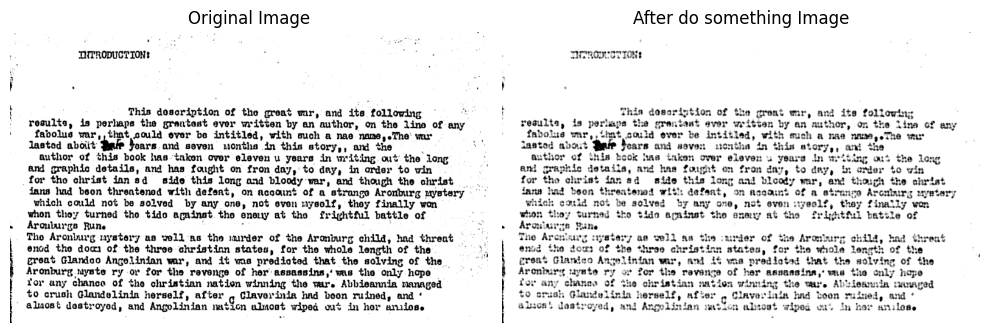

In [ ]:
# Answer your code here
image_gray = io.imread('OldText.png', as_gray=True)

selem = morphology.disk(1)
closed_image = morphology.closing(image_gray, selem)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image_gray, cmap='gray')
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title('After do something Image')
plt.imshow(closed_image, cmap='gray')
plt.axis("off")

plt.tight_layout()
plt.show()

# Section 4

Binary image processing (Measurement)


> Data that you'll use in this section is "Mitosis cells" and implement to solve each prblem to get result with scikit-image libraries.


1.   Please show this following details of


*   Show area of objects.
*   Create bounding box cover each objects.
*   Show centroid of each objects.
*   Show eccentricity of each objects.
*   Show solidity of each objects.





In [ ]:
from skimage import io
import matplotlib.pyplot as plt
from skimage.segmentation import mark_boundaries
from skimage.measure import label, regionprops, find_contours
import cv2
from skimage.morphology import convex_hull_image

import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

Downloading...
From: https://drive.google.com/uc?id=1_mCcNuUPuSPUew0T-EmoTZBRNcOJ0jDM
To: /content/mitosis_mod.tif
100% 5.16k/5.16k [00:00<00:00, 10.9MB/s]


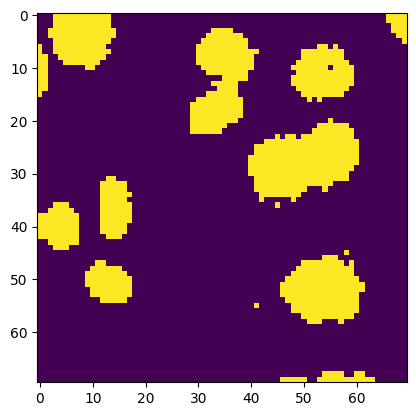

In [ ]:
#import data
!gdown 1_mCcNuUPuSPUew0T-EmoTZBRNcOJ0jDM

image_path = '/content/mitosis_mod.tif'
image_cells = io.imread(image_path, as_gray=True)
image_cells_binary = image_cells > 65
plt.imshow(image_cells_binary)

In [ ]:
# Answer your code here
image_cells_binary = image_cells > 65
labeled_image = label(image_cells_binary, connectivity=2)
regions = regionprops(labeled_image)

print("Areas of objects:")
for i, region in enumerate(regions, start=1):
    print(f"\tObject {i}: Area = {region.area}")

Areas of objects:
	Object 1: Area = 109.0
	Object 2: Area = 17.0
	Object 3: Area = 163.0
	Object 4: Area = 17.0
	Object 5: Area = 95.0
	Object 6: Area = 221.0
	Object 7: Area = 60.0
	Object 8: Area = 57.0
	Object 9: Area = 1.0
	Object 10: Area = 1.0
	Object 11: Area = 150.0
	Object 12: Area = 55.0
	Object 13: Area = 1.0
	Object 14: Area = 17.0
	Object 15: Area = 5.0


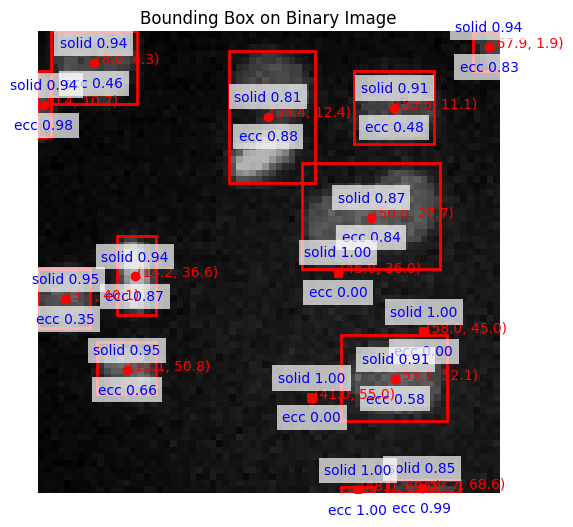

In [ ]:
# Step 4: Visualize the image and bounding boxes
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(image_cells, cmap='gray')
ax.set_title('Bounding Box on Binary Image')
convex_hull = convex_hull_image(image_cells)

for region in regions:
    min_row, min_col, max_row, max_col = region.bbox
    centroid_y, centroid_x = region.centroid
    eccentricity = region.eccentricity
    solidity = region.solidity

    rect = plt.Rectangle(
        (min_col-0.5, min_row-0.5),
        max_col - min_col,
        max_row - min_row,
        edgecolor='red',
        facecolor='none',
        linewidth=2
    )
    ax.add_patch(rect)

    ax.plot(centroid_x, centroid_y, 'ro')  # 'ro' means red circle
    ax.text(centroid_x+0.3 , centroid_y, f'({centroid_x:.1f}, {centroid_y:.1f})',
            color='red', fontsize=10)

    ax.text(
        centroid_x, centroid_y+3, f'ecc {eccentricity:.2f}',
        color='blue', fontsize=10, ha='center', va='center',
        bbox=dict(facecolor='white', edgecolor='none', alpha=0.7)
    )

    ax.text(
        centroid_x, centroid_y-3, f'solid {solidity:.2f}',
        color='blue', fontsize=10, ha='center', va='center',
        bbox=dict(facecolor='white', edgecolor='none', alpha=0.7)
    )

ax.imshow(convex_hull, cmap='gray', interpolation='none', alpha=0.3)
plt.axis('off')
plt.show()
